# 2025-08-22 Welcome

## CSCI 3656 Numerical Computation

Prof [Jeremy L Thompson](https://jeremylt.org>) (he/they)

* Contact: jeremy.thompson@colorado.edu

* Course Website: https://jeremylt.github.io/csci-3656-fall-2025

* Course Textbook: https://tobydriscoll.net/fnc-julia

* Course Zulip: https://csci-2656-fall-2025.zulipchat.com/join/kq2jysp7fp74ldcgt23ge4c3

## About Me

* Jeremy L Thompson (he/they)

* Currently Assistant Research Professor & Research Software Engineer

* Formerly Weapons Test Analyst (USAFA), Professor (USAFA)

* [libCEED](https://github.com/CEED/libCEED), [Ratel](https://gitlab.com/micromorph/ratel), and more

## Prereqs

### Calculus

* Fundamental Theorem of Calculus

* Differentiation & integration of polynomials

* Taylor series

* Gradients (ToDo for us)

Don't need any fancy 'tricks'

### Linear Algebra

* Vector spaces

* Orthogonality

* QR factorization

* Projectiors, reflectors, rotations (ToDo for us)

Also don't need any hand matrix manipulation

## What is Numerical Computation?

[Trefethen (1992)](https://people.maths.ox.ac.uk/trefethen/publication/PDF/1992_55.pdf) 

> Here is the wrong answer:
> > Numerical analysis is the study of rounding errors.

> I propose the following alternative definition
> > Numerical analysis is the study of algorithms for the problems of continuous mathematics

## Continuous Mathematics ?!?

* Finite representations of continuous objects
  - real and complex numbers $x \in \mathcal{R}$
  - vectors $\bf{x} \in \mathcal{R}^n$
  - matrices $\bf{A} \in \mathcal{R}^{m \times n}$

* Infinite representations of continuous objects
  - functions $f: \mathcal{R} \rightarrow \mathcal{R}$
  - high order functions $g \left( f \right)$

TLDR: Real or complex numbers involved

## Rootfinding

Given $f \left( x \right)$, find $x$ such that $f \left( x \right) = 0$

* Convergence - how many steps to I have to take to find the root?

* Cost - how much work does each step require?

* Robustness - can the algorithm fail?

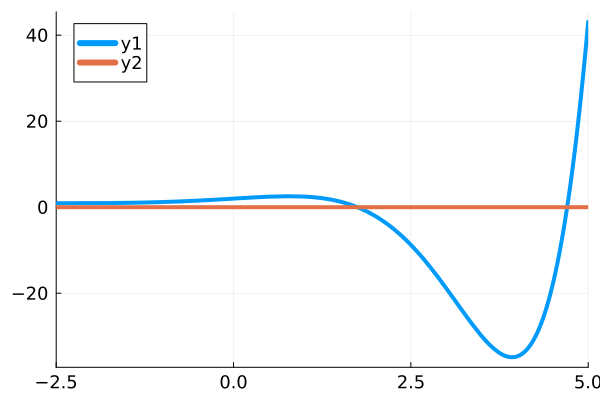

In [1]:
using Plots
default(
    linewidth=4,
    markersize=5,
    legendfontsize=12,
    xtickfontsize=12,
    ytickfontsize=12,
)

a = 1
f(x) = exp(x) * cos(a * x) + 1
plot([f, x -> 0], xlims=[-2.5, 5])

## Linear Algebra

Matrix factorizations are broadly useful

* Finite algorithms
  - $Q R = A$ such that $Q^T Q = I$ and $R$ is upper right triangular
  - $L U = A$ such that $L$ and $U$ are lower and upper triangular

* Infinite algorithms
  - $X \Lambda X^{-1} = A$ where $\Lambda$ is diagonal
  - $U \Sigma V^T = A$ such that $U^T U = I$, $V^T V = I$ and $\Sigma$ is diagonal with non-negative entries
  - Solving $A x = b$ with Krylov basis $\lbrace b, A b, A^2 b, ... \rbrace$

## Key Ideas

* Cost estimates

* Stability of algorithms (forward and backward)

* Conditioning

* Orthogonality, null spaces, projections

* Connection between the algorithms and applications

## Function Approximation

* Interpolation (exact)
  - Given $\left( x_0, f \left( x_0 \right) \right), \left( x_1, f \left( x_1 \right) \right), ... $, find easy to compute $g \left( x \right)$ that exactly matches given data and is reasonable between datapoints

* Regression (inexact)
  - Given noisy data $\left( x_0, y_0 \right), \left( x_1, y_1 \right), ...$, find easy to compute $g \left( x \right)$ that explains the data

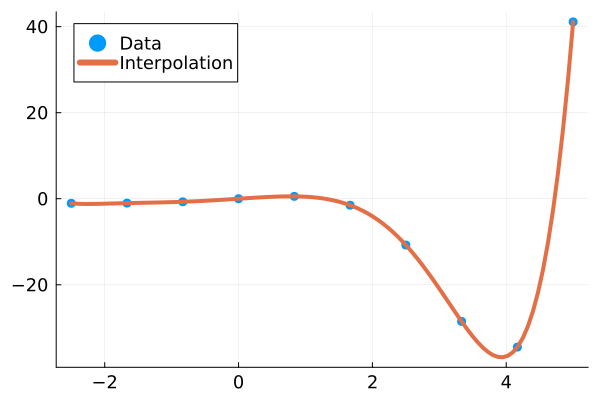

In [2]:
using Polynomials
using Plots

a = 1
xi = range(-2.5, 5, length=10)
yi = @. exp(xi) * cos(a * xi) - 1
p = fit(xi, yi)
scatter(xi, yi, markerstrokewidth=0, label="Data")
plot!(p, extrema(xi)..., label="Interpolation")

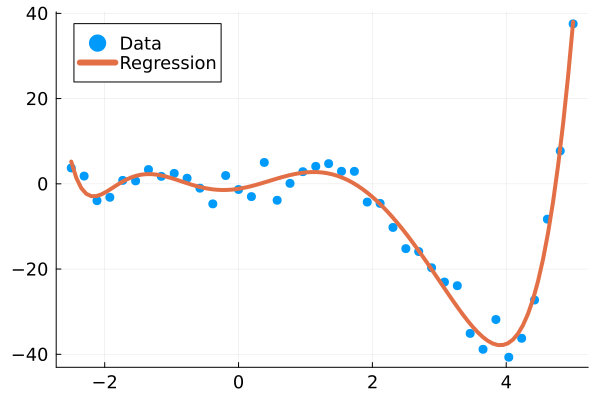

In [3]:
using CurveFit
using Polynomials
using Plots

a = 1
xi = range(-2.5, 5, length=40)
yi = @. exp(xi) * cos(a * xi) - 1
yi = @. yi + 10 * (rand() - 0.5) # added noise
p = Polynomial(poly_fit(xi, yi, 9))
scatter(xi, yi, markerstrokewidth=0, label="Data")
plot!(p, extrema(xi)..., label="Regression")

## Calculus

* Differentiation: Given $f \left( x \right)$, find $g \left( x \right) \approx f' \left( x \right)$
  - Numerical approximation
  - Automatic differentiation

* Integration: Given $f \left( x \right)$, compute  a reasonable approximation to $\int_a^b f \left( x \right) dx$
  - Related to function approximation

## Optimization

Given a function $f \left( x \right)$ (and often also $f ' \left( x \right)$), find

$$ x_* = \text{argmin}_x f \left( x \right) $$

## Differential Equations

Given

$$ \frac{\partial u \left( t \right)}{\partial t} = f \left( u \left( t \right) \right) $$

and initial condition $u \left( 0 \right) = u_0$

approximate $u \left( t \right)$ for any $t$

## Considerations

For each topic, we'll cover

* Mathematical basis

* Algorithmic cost

* Limitations

* Pitfalls

* Verification/Validation

## Ungrading

* What?

* Why?

* How?

## But I Need *A* Grade ?!?

* Create SMART goals and update them

* Journal about your course goals and progress

* Collect a portfolio of your best work over the semester

* Especially include any detours you take

* We discuss at the end of the semester and you propose a grade to me

## Flow

* Lecture periods M, W, F (bring questions)

* Home activities and quizzes on alternating Fridays

* Written feedback returned on these activities

* Update your goals and journals every week

* Ask questions on the class Zulip

## Project

* Two parts, solo and team

* Solo part investigates a community software package

* Team part studies or contributes to a community software package

## Floating Point Arithmatic

How and why does floating point arithmatic give answers that are inconsistent with continuous mathematics?

In [4]:
# What decimal values will not exhibit this behavior?
0.1 + 0.2

0.30000000000000004

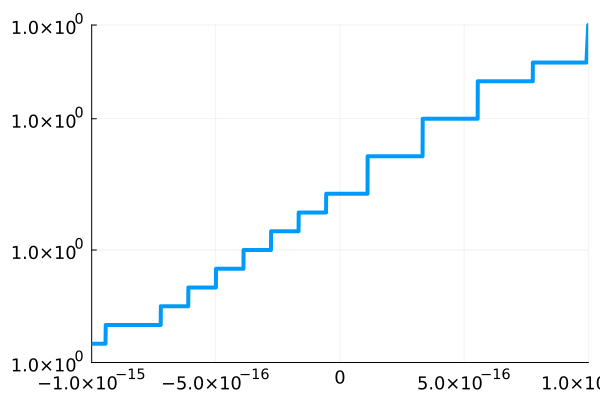

GKS: Possible loss of precision in routine SET_WINDOW


In [5]:
a = 1e-15
plot(x -> 1 + x, xlim=(-a, a), legend=:none)

## Machine precision

Floating point numbers do not exactly represent continuous values.

There exists $\epsilon_\text{machine}$ such that

$$ 1 \oplus x = 1 $$ for all $$ \lvert x \rvert < \epsilon_\text{machine} $$

Note: $\oplus, \ominus, \otimes, \oslash$ are the floating point arithmatic versions of $+, -, \times, /$

In [6]:
# Lets find ϵ
ϵ = 1
# will this be the biggest possible ϵ?
while 1 + ϵ != 1
    ϵ = ϵ / 2
end

@show ϵ;

ϵ = 1.1102230246251565e-16


### Remember Taylor Series?

$$ log \left( 1 + x \right) = x - \frac{x^2}{2} + \frac{x^3}{3} - \frac{x^4}{4} + \cdots $$

Which is more accurate for computing $log \left( 1 + x \right)$?

Note: This issue shows up in Ratel!

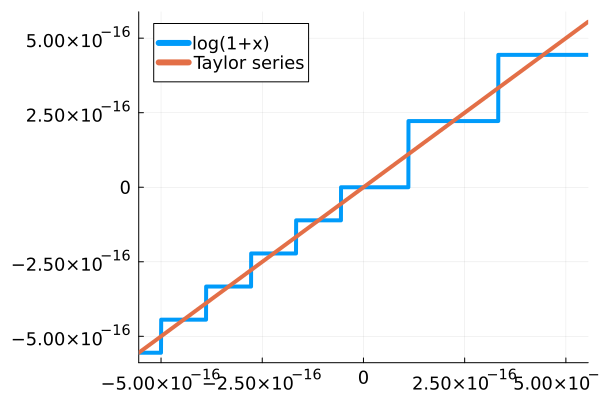

In [7]:
# But why do we care?
f1(x) = log(1 + x)
f2(x) = x - x^2 / 2 + x^3 / 3

plot([f1, f2], xlims=[-5 * ϵ, 5 * ϵ], label=["log(1+x)" "Taylor series"])

In [8]:
# How to measure the error?
y1 = f1(1e-8)
y2 = f2(1e-8)

# Absolute
println("absolute error: $(y1 - y2)")

# Relative
println("relative error: $((y1 - y2) / y2)")

absolute error: -6.07747099184471e-17
relative error: -6.077471022232065e-9
